In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import os

In [3]:
num_agents = 200
num_iterations = 150
# num_params = 61
num_params = 25

In [4]:
default = utils.read_csv('checkpoint/default.csv')[0]
default_params = default[:num_params]
default_metrics = default[num_params:]

In [5]:
metrics = [pd.read_csv('history/iteration' + str(i) + '.csv', header=None, usecols=[num_params, num_params + 1]).transpose().to_numpy()
           for i in range(num_iterations)]


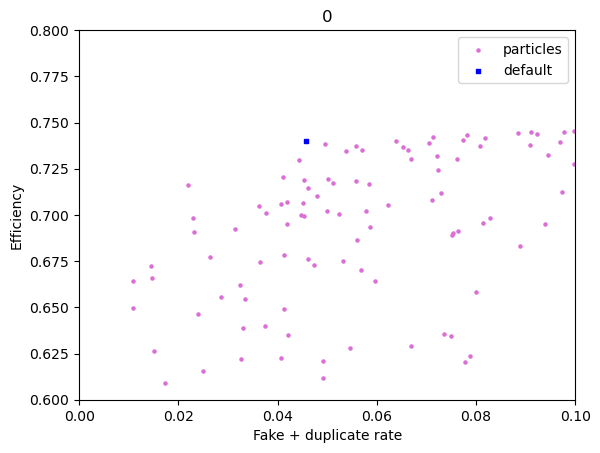

In [41]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0., 0.1)
    ax.set_ylim(0.6, 0.8)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], s=5, color='orchid', label='particles')
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c='green', s=10)
    s = ax.scatter([default_metrics[1]], [1 - default_metrics[0]], marker='s', color='blue', s=10, label='default')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_xlabel("Fake + duplicate rate")
    ax.set_ylabel("Efficiency")
    ax.legend()
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('checkpoint/metrics.gif', writer='pillow')


In [7]:
pareto_front = utils.read_csv('checkpoint/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, num_params + 1].argsort()]
pareto_x = [particle[num_params + 1] for particle in pareto_front]

pareto_y = [1 - particle[num_params] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [8]:
len(pareto_front)

598

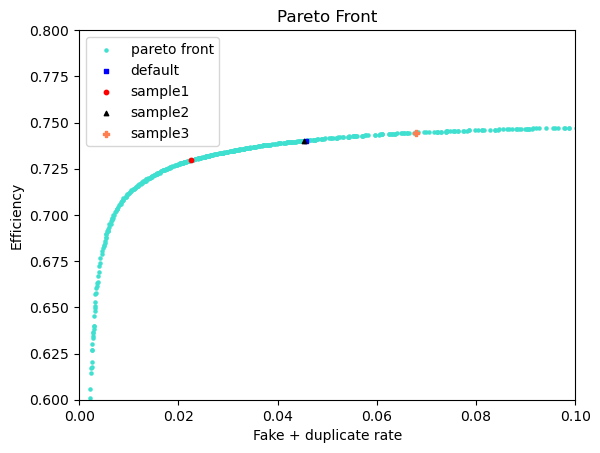

In [47]:
point1 = pareto_front[200]
point2 = pareto_front[350]
point3 = pareto_front[420]


plt.scatter(pareto_x, pareto_y, s=5, color='turquoise', label='pareto front')

plt.scatter(default_metrics[1], 1 - default_metrics[0], marker='s', color='blue', s=10, label='default')
plt.scatter([point1[num_params + 1]], [1 - point1[num_params]], color='red', s=10, label='sample1')
plt.scatter([point2[num_params + 1]], [1 - point2[num_params]], marker='^', color='black', s=10, label='sample2')
plt.scatter([point3[num_params + 1]], [1 - point3[num_params]], marker='P', color='coral', s=15, label='sample3')
plt.legend()

# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0.0, 0.1)
plt.ylim(0.6, 0.8)
plt.xlabel('Fake + duplicate rate')
plt.ylabel('Efficiency')
plt.title('Pareto Front')
plt.savefig('checkpoint/pf.png')
plt.show()


In [48]:
print([point1[i] for i in range(num_params)])
print([point2[i] for i in range(num_params)])
print([point3[i] for i in range(num_params)])

[0.001810662567296451, 0.003087555630397035, 0.09246714653350764, 0.18152341708025987, 0.494168726360568, 14.138457372816534, 586.056241705347, 572.609333810121, 799.7658913490137, 529.236956888209, 781.2205619188171, 659.3251159558248, 685.3600247218071, 711.798504877761, 720.5207379590859, 607.1881073679643, 812.2225118513732, 754.319867935467, 746.914171448225, 566.801805795892, 642.8942235801952, 764.931566933547, 695.7574286025573, 685.6607185592361, 529.5465868725981]
[0.002026680601574826, 0.003667961007414807, 0.13973166431929473, 0.2601286664785727, 0.6234191906795576, 12.748718895130501, 611.3509687106036, 599.0906311831084, 767.7894986875152, 554.1099289081602, 822.405233723454, 609.5225565238915, 654.9684509130346, 789.3707925441487, 781.3712354553714, 696.0467818105441, 767.6130509993511, 852.5787960669536, 758.7497788361125, 603.9374646454572, 681.0987713007432, 680.1745133327155, 627.7336421012832, 668.1327971090925, 664.1902624590334]
[0.002270949818772689, 0.0045486900

In [49]:
selected_params = [default_params, point1[:num_params], point2[:num_params], point3[:num_params]]
# selected_params

In [45]:
utils.write_csv('checkpoint/selected_params.csv', selected_params)

In [20]:
# print(point1)
# print(point2)
# print(point3)